# **AIR QUALITY PREDICTION USING MACHINE LEARNING**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loading the Dataset

In [35]:
filepath="/content/cleaned_air_quality_data.csv"

In [36]:
data=pd.read_csv(filepath)

In [33]:
data.shape

(29531, 16)

In [5]:
data.head(10)

City        Date  PM2.5  PM10      NO    NO2     NOx  NH3      CO  \
0  Ahmedabad  2015-01-01    NaN   NaN    0.92  18.22   17.15  NaN    0.92   
1  Ahmedabad  2015-01-02    NaN   NaN    0.97  15.69   16.46  NaN    0.97   
2  Ahmedabad  2015-01-03    NaN   NaN   17.40  19.30   29.70  NaN   17.40   
3  Ahmedabad  2015-01-04    NaN   NaN    1.70  18.48   17.97  NaN    1.70   
4  Ahmedabad  2015-01-05    NaN   NaN   22.10  21.42   37.76  NaN   22.10   
5  Ahmedabad  2015-01-06    NaN   NaN   45.41  38.48   81.50  NaN   45.41   
6  Ahmedabad  2015-01-07    NaN   NaN  112.16  40.62  130.77  NaN  112.16   
7  Ahmedabad  2015-01-08    NaN   NaN   80.87  36.74   96.75  NaN   80.87   
8  Ahmedabad  2015-01-09    NaN   NaN   29.16  31.00   48.00  NaN   29.16   
9  Ahmedabad  2015-01-10    NaN   NaN     NaN   7.04    0.00  NaN     NaN   

     SO2      O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  27.64  133.36     0.00     0.02    0.00  NaN        NaN  
1  24.55   34.06     3.68     5.50    3.77  NaN        NaN  
2  29.07   30.70     6.80    16.40    2.25  NaN        NaN  
3  18.59   36.08     4.43    10.14    1.00  NaN        NaN  
4  39.33   39.31     7.01    18.89    2.78  NaN        NaN  
5  45.76   46.51     5.42    10.83    1.93  NaN        NaN  
6  32.28   33.47     0.00     0.00    0.00  NaN        NaN  
7  38.54   31.89     0.00     0.00    0.00  NaN        NaN  
8  58.68   25.75     0.00     0.00    0.00  NaN        NaN  
9   8.29    4.55     0.00     0.00    0.00  NaN        NaN

In [6]:
data.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [8]:
data.describe()

PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730     28.560659     32.309123   
std       64.661449     90.605110     22.785846     24.474746     31.646011   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.820000     56.255000      5.630000     11.750000     12.820000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       80.590000    149.745000     19.950000     37.620000     40.127500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  19203.000000  27472.000000  25677.000000  25509.000000  23908.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       25.684275      6.962884     18.133775     21.694928     15.811136   
min        0.010000      0.000000      0.010000      0.010000      0.000000   
25%        8.580000      0.510000      5.670000     18.860000      0.120000   
50%       15.850000      0.890000      9.160000     30.840000      1.070000   
75%       30.020000      1.450000     15.220000     45.570000      3.080000   
max      352.890000    175.810000    193.860000    257.730000    455.030000   

            Toluene        Xylene           AQI  
count  21490.000000  11422.000000  24850.000000  
mean       8.700972      3.070128    166.463581  
std       19.969164      6.323247    140.696585  
min        0.000000      0.000000     13.000000  
25%        0.600000      0.140000     81.000000  
50%        2.970000      0.980000    118.000000  
75%        9.150000      3.350000    208.000000  
max      454.850000    170.370000   2049.000000

# Exploratory Data Analysis

## Handling Missing Values

In [9]:
data.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [10]:
numerical=["PM2.5","PM10","SO2","NO2","CO","O3","AQI","NOx","NH3","NO","NH3","Benzene","Toluene","Xylene","AQI"]
for col in numerical:
  data[col].fillna(data[col].median(),inplace=True)

<ipython-input-10-91d492cec1a6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(),inplace=True)


In [11]:
data["AQI_Bucket"]=data["AQI_Bucket"].fillna(data["AQI_Bucket"].mode()[0])

In [12]:
data.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [14]:
data.head()

City        Date  PM2.5   PM10     NO    NO2    NOx    NH3     CO  \
0  Ahmedabad  2015-01-01  48.57  95.68   0.92  18.22  17.15  15.85   0.92   
1  Ahmedabad  2015-01-02  48.57  95.68   0.97  15.69  16.46  15.85   0.97   
2  Ahmedabad  2015-01-03  48.57  95.68  17.40  19.30  29.70  15.85  17.40   
3  Ahmedabad  2015-01-04  48.57  95.68   1.70  18.48  17.97  15.85   1.70   
4  Ahmedabad  2015-01-05  48.57  95.68  22.10  21.42  37.76  15.85  22.10   

     SO2      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
0  27.64  133.36     0.00     0.02    0.00  118.0   Moderate  
1  24.55   34.06     3.68     5.50    3.77  118.0   Moderate  
2  29.07   30.70     6.80    16.40    2.25  118.0   Moderate  
3  18.59   36.08     4.43    10.14    1.00  118.0   Moderate  
4  39.33   39.31     7.01    18.89    2.78  118.0   Moderate

## Handling Duplicates

In [16]:
duplicates=data[data.duplicated()]
print(f"Number of Duplicate Rows:{len(duplicates)} ")

Number of Duplicate Rows:0 


### No dupicates found

## Outlier Removal

### Detecting Outliers

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'PM2.5'),
  Text(1, 0, 'PM10'),
  Text(2, 0, 'NO'),
  Text(3, 0, 'NO2'),
  Text(4, 0, 'NOx'),
  Text(5, 0, 'NH3'),
  Text(6, 0, 'CO'),
  Text(7, 0, 'SO2'),
  Text(8, 0, 'O3'),
  Text(9, 0, 'Benzene'),
  Text(10, 0, 'Toluene'),
  Text(11, 0, 'Xylene'),
  Text(12, 0, 'AQI')])

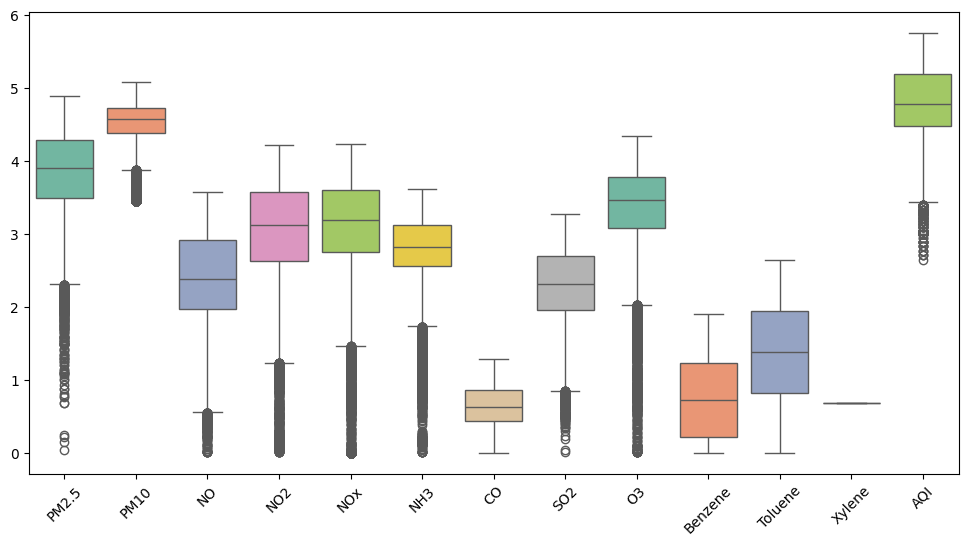

In [37]:
plt.figure(figsize=(12,6))
sns.boxplot(data,palette="Set2")
plt.xticks(rotation=45)

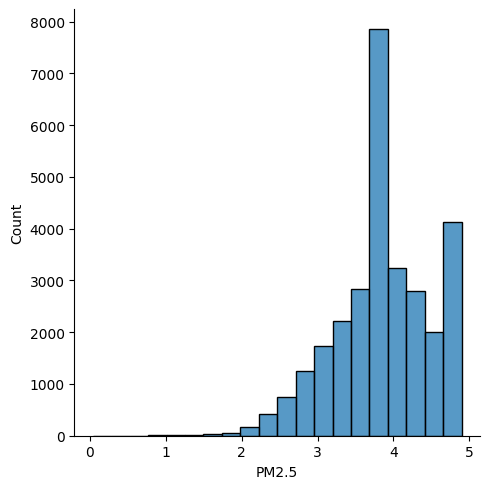

In [38]:
sns.displot(data["PM2.5"],bins=20)

In [39]:
def detect_outliers(df, features):
    q25, q50, q75 = np.percentile(df[features], [25, 50, 75])
    iqr = q75 - q25
    lower_bound = q25 - (1.5 * iqr)
    upper_bound = q75 + (1.5 * iqr)
    return df[(df[features] > upper_bound) | (df[features] < lower_bound)]


In [40]:
def cap_outliers(df, features):
    q25, q75 = np.percentile(df[features], [25, 75])
    iqr = q75 - q25
    lower_bound = q25 - (1.5 * iqr)
    upper_bound = q75 + (1.5 * iqr)
    df[features] = np.where(df[features] < lower_bound, lower_bound, df[features])
    df[features] = np.where(df[features] > upper_bound, upper_bound, df[features])
    return df

### Handling Outliers

In [21]:
columns = ["PM2.5", "PM10", 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

In [22]:
def log_transformations(df, columns):
    for col in columns:
        if col in df.columns:
            df[col] = np.log1p(df[col])


In [23]:
for col in columns:
  df = cap_outliers(data, col)


### Apply Log Transformation

In [24]:
data=log_transformations(data,columns)

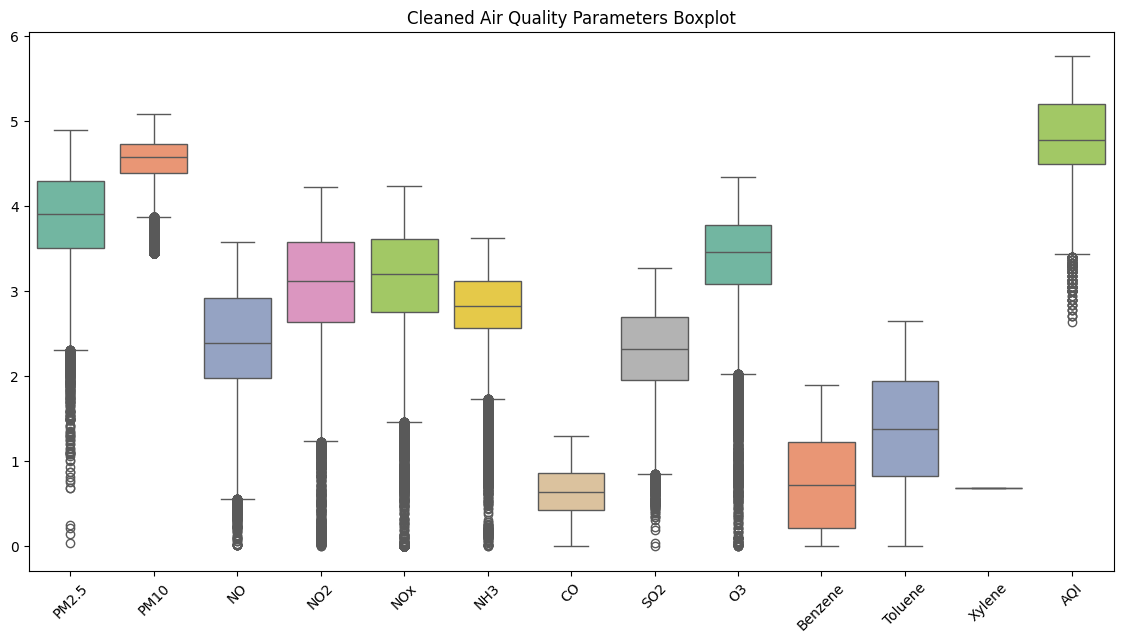

In [25]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Cleaned Air Quality Parameters Boxplot")
plt.show()

In [26]:
df.to_csv('cleaned_air_quality_data.csv', index=False)

### Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
columns_to_scale = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
scaled_data=StandardScaler().fit_transform(df[columns_to_scale])

Correlation and Heatmap

In [41]:
nums = data.select_dtypes(include=['float'])
nums_corr = nums.corr()
top_features = nums_corr[(abs(nums_corr) > 0.5) & (nums_corr != 1)]
top_features_sorted = top_features.stack().sort_values(ascending=False)
print("There is a strong correlation between the following features:")
print(top_features_sorted)


There is a strong correlation between the following features:
PM2.5    AQI        0.805751
AQI      PM2.5      0.805751
PM2.5    PM10       0.722683
PM10     PM2.5      0.722683
Benzene  Toluene    0.714759
Toluene  Benzene    0.714759
PM10     AQI        0.669399
AQI      PM10       0.669399
NO       NOx        0.609336
NOx      NO         0.609336
dtype: float64


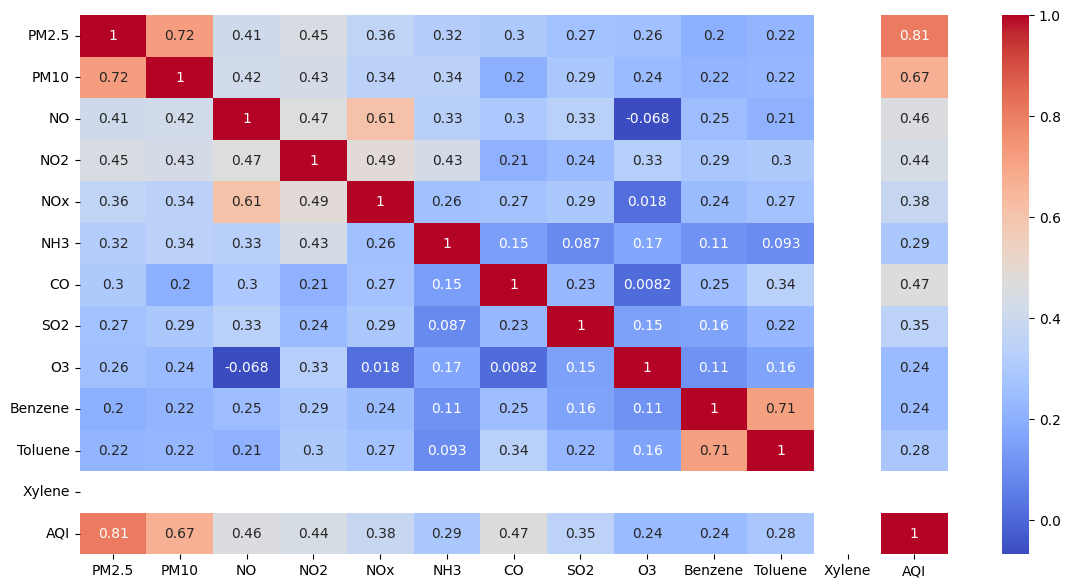

In [42]:
plt.figure(figsize=(14,7))
sns.heatmap(nums_corr,annot=True,cmap="coolwarm")
plt.show()

## Label Encoding-AQI_Bucket

In [43]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data["AQI_Bucket"]=label_encoder.fit_transform(data["AQI_Bucket"])

## EDA-Visualizations

<Axes: xlabel='AQI_Bucket', ylabel='count'>

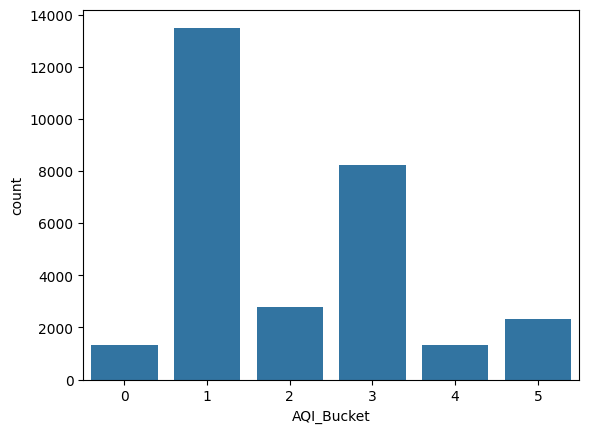

In [44]:
sns.countplot(x='AQI_Bucket', data=data)

#### Bivariate Analysis

<Axes: xlabel='PM2.5', ylabel='PM10'>

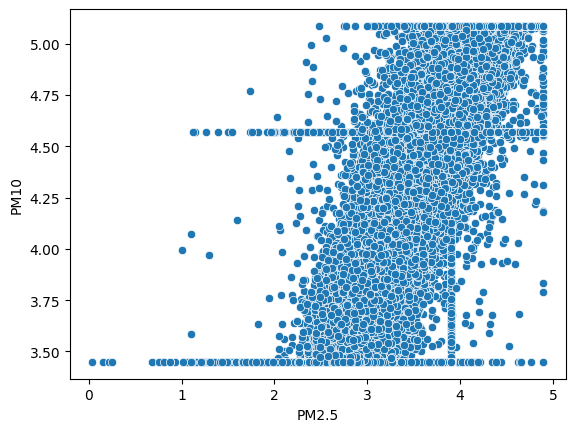

In [45]:
sns.scatterplot(x='PM2.5', y='PM10', data=data)

#### Multi-Variate Analysis

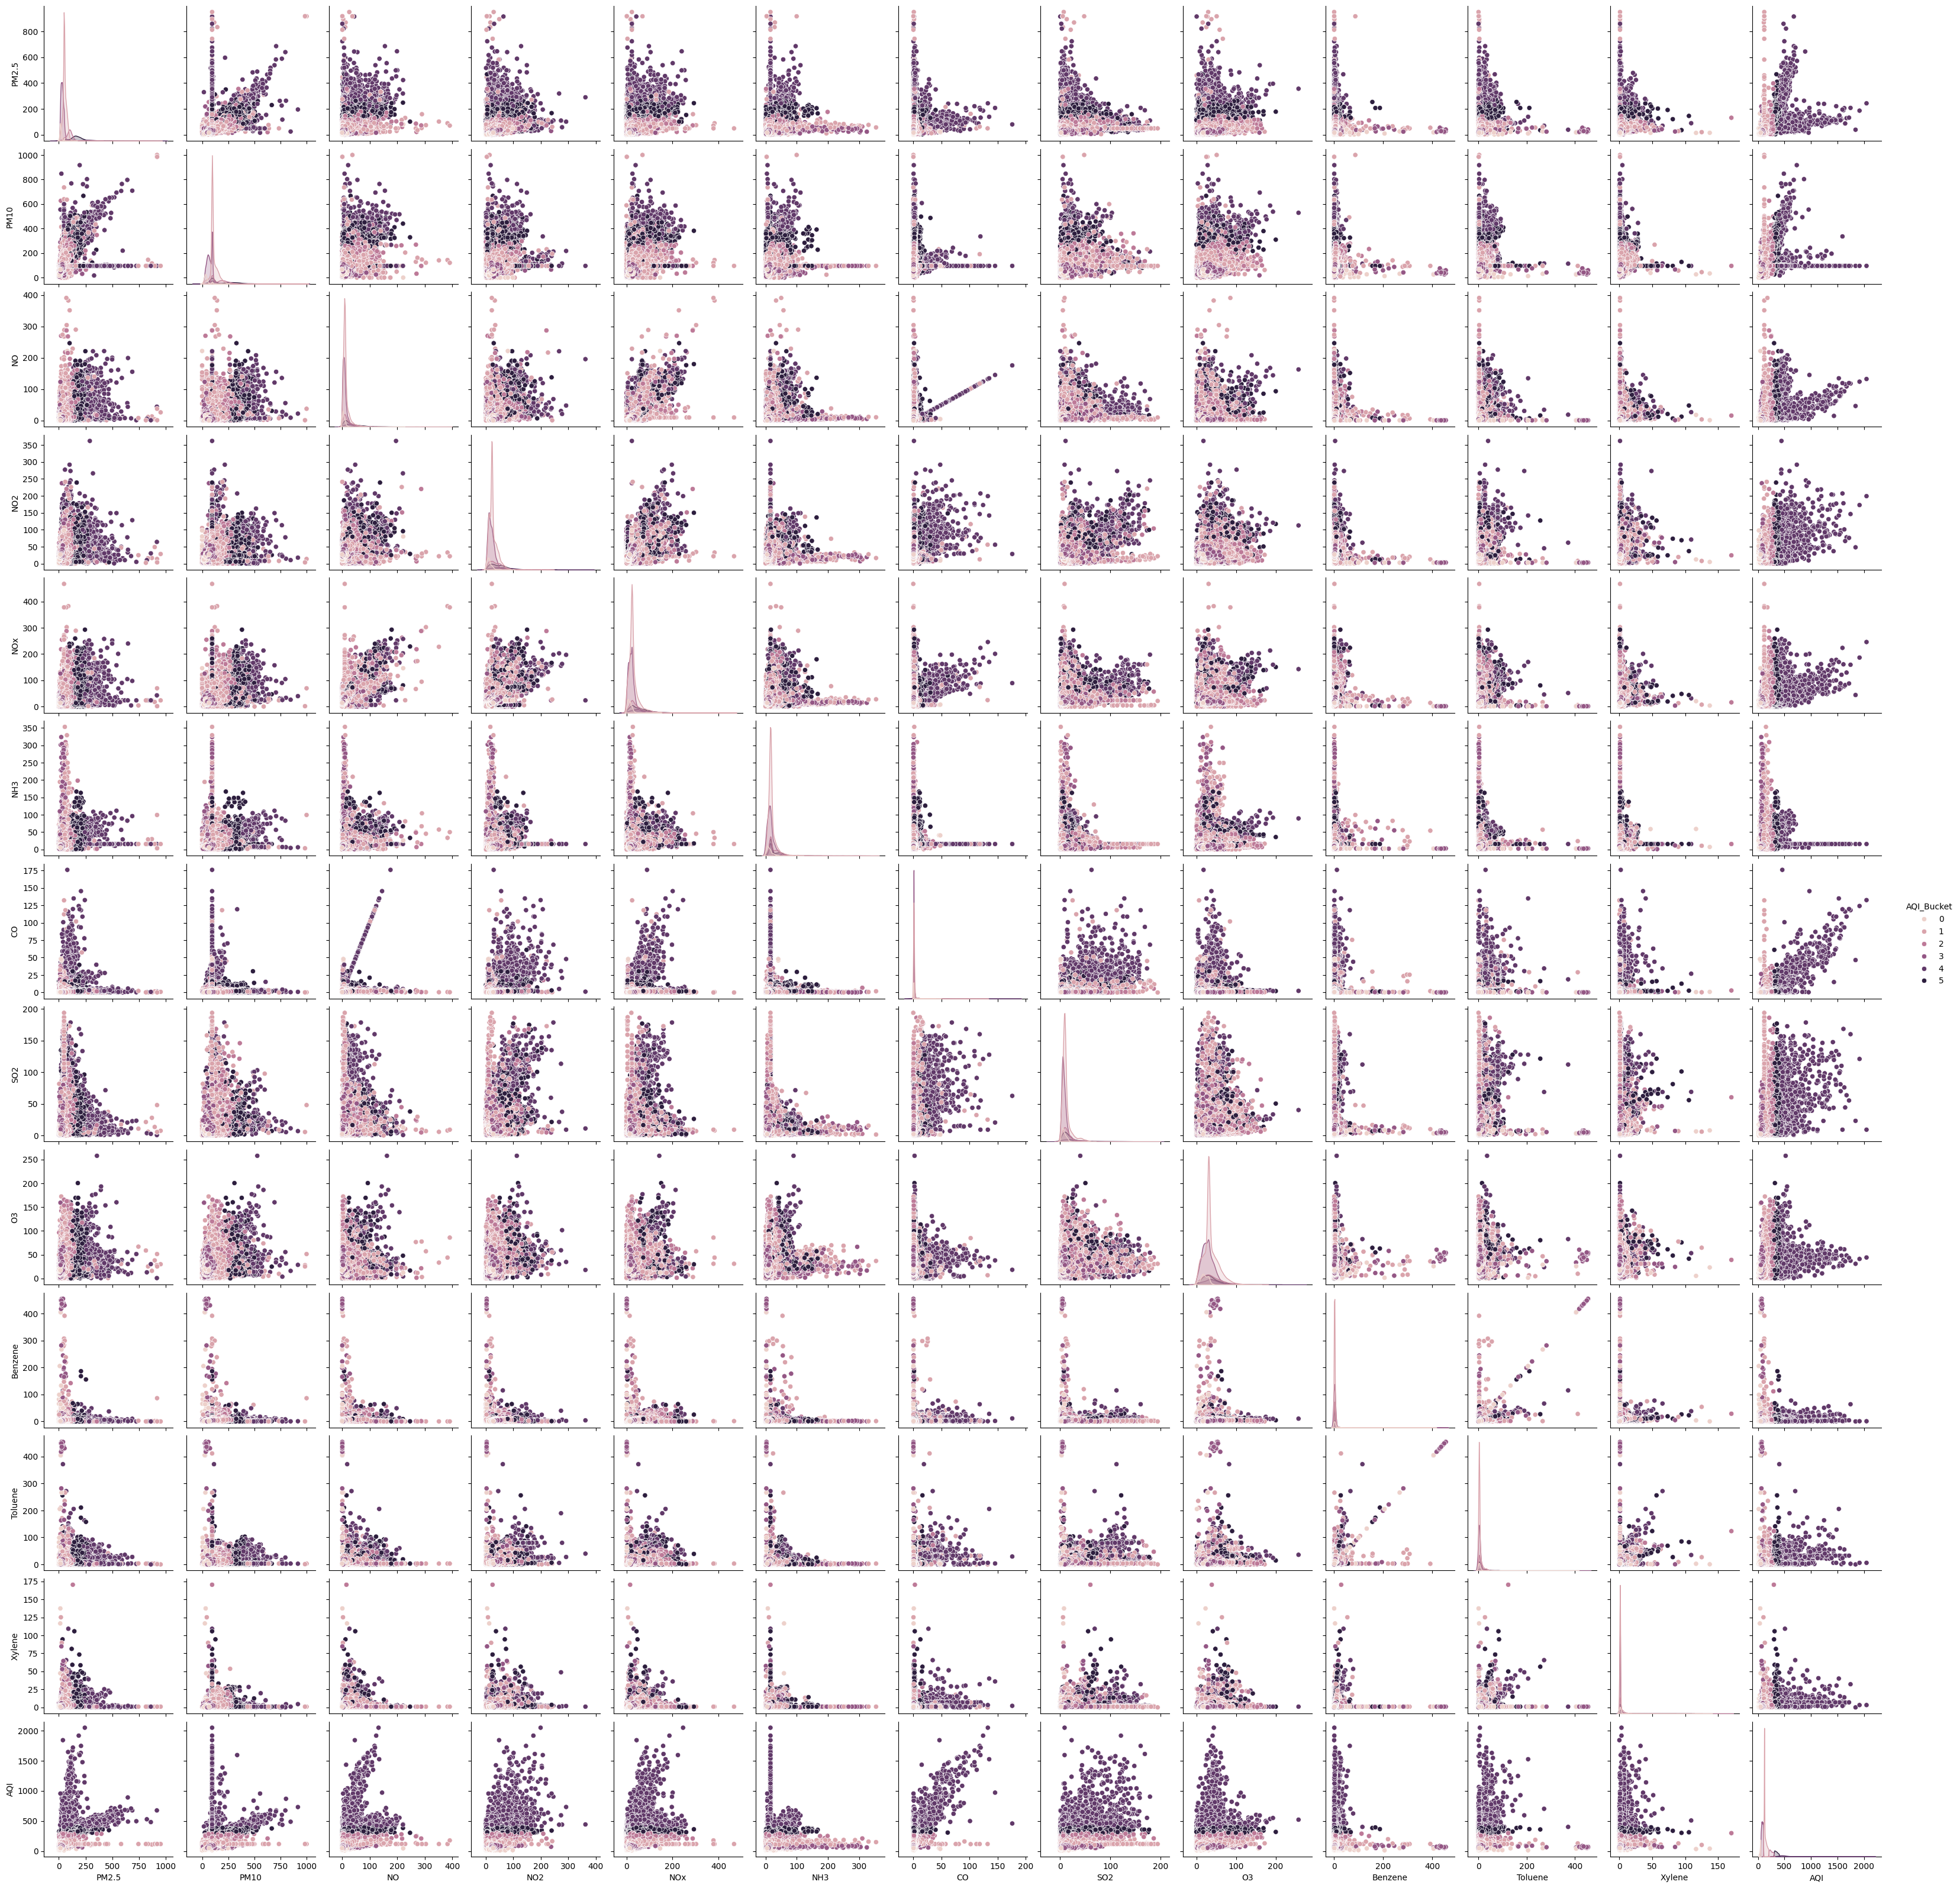

In [ ]:
sns.pairplot(data, hue='AQI_Bucket')
plt.show()

# **ML Model Training**

# **REGRESSION**

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

In [47]:
X=data.drop(columns=["City","Date","AQI","AQI_Bucket"])
y=data["AQI"]

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#### Since the target column is categorical opted for classification algorithms

## Linear Regression

In [49]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

In [50]:
r2_scores_lr=r2_score(y_test,y_pred_lr)
mse_lr=mean_squared_error(y_test,y_pred_lr)
mae_lr=mean_absolute_error(y_test,y_pred_lr)
print("R_2-Score ",r2_scores_lr)
print("MSE: ",mse_lr)
print("MAE: ",mae_lr)

R_2-Score  0.7279601748058675
MSE:  0.07951261419383154
MAE:  0.21174784373004837


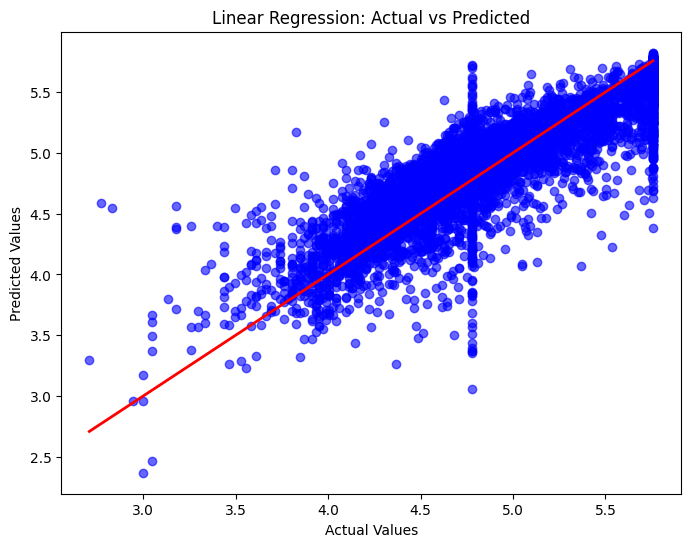

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [52]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')
print("Cross Validation Scores:",cv_scores)

Cross Validation Scores: [0.7468706  0.74163223 0.74110443 0.73270951 0.72854722]


## Lasso Regression

In [53]:
ls=Lasso(alpha=0.1)
ls.fit(X_train,y_train)
ls_pred=ls.predict(X_test)

In [54]:
r2_scores_ls=r2_score(y_test,ls_pred)
mse_ls=mean_squared_error(y_test,ls_pred)
mae_ls=mean_absolute_error(y_test,ls_pred)
print("R_2-Score ",r2_scores_ls)
print("MSE: ",mse_ls)
print("MAE: ",mae_ls)

R_2-Score  0.5700853868441489
MSE:  0.1256567296635978
MAE:  0.27309949134800104


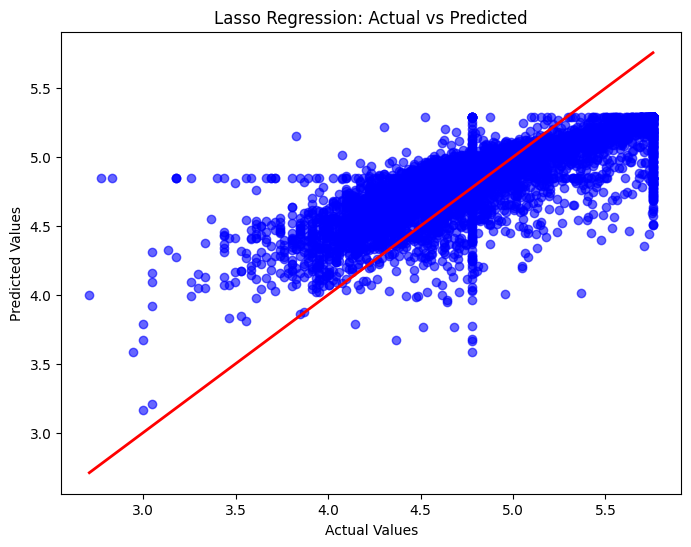

In [55]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, ls_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Lasso Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [56]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(ls, X_train, y_train, cv=5, scoring='r2')
print("Cross Validation Scores:",cv_scores)

Cross Validation Scores: [0.57888045 0.57449778 0.56805979 0.56858486 0.56891935]


## Ridge Regression

In [57]:
ridge=Ridge(alpha=0.5)
ridge.fit(X_train,y_train)
pred_ridge=ridge.predict(X_test)

In [58]:
r2_scores_ridge=r2_score(y_test,pred_ridge)
mse_ridge=mean_squared_error(y_test,pred_ridge)
mae_ridge=mean_absolute_error(y_test,pred_ridge)
print("R_2-Score ",r2_scores_ridge)
print("MSE: ",mse_ridge)
print("MAE: ",mae_ridge)

R_2-Score  0.7279616616053259
MSE:  0.07951217962763653
MAE:  0.21174826737609975


In [59]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2')
print("Cross Validation Scores:",cv_scores)

Cross Validation Scores: [0.74687109 0.74163123 0.74110397 0.73271072 0.72854726]


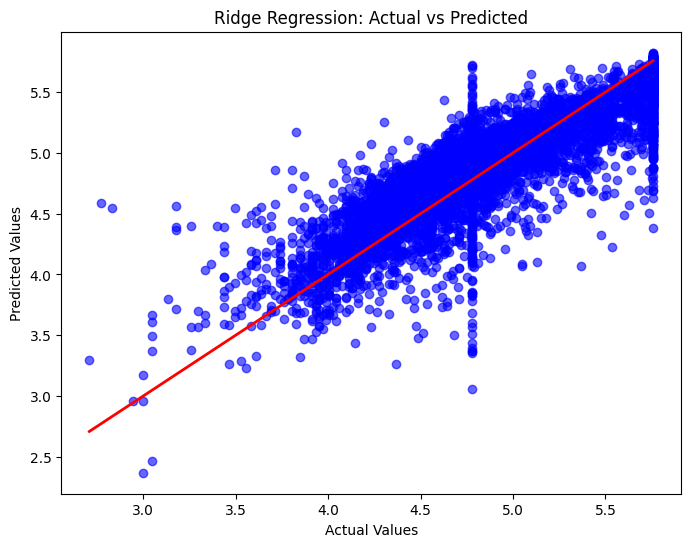

In [60]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_ridge, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Ridge Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

## Polynomial Regression

In [61]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
degree = 2
polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polynomial_model.fit(X_train, y_train)
y_pred_poly = polynomial_model.predict(X_test)

In [62]:
print("Polynomial Regression:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_poly)}")
print(f"R2 Score: {r2_score(y_test, y_pred_poly)}")

Polynomial Regression:
Mean Squared Error: 0.05294991867190433
R2 Score: 0.8188402335202574


In [63]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(polynomial_model, X_train, y_train, cv=5, scoring='r2')
print("Cross Validation Scores:",cv_scores)

Cross Validation Scores: [0.82891298 0.8200571  0.82118204 0.81621823 0.81616355]


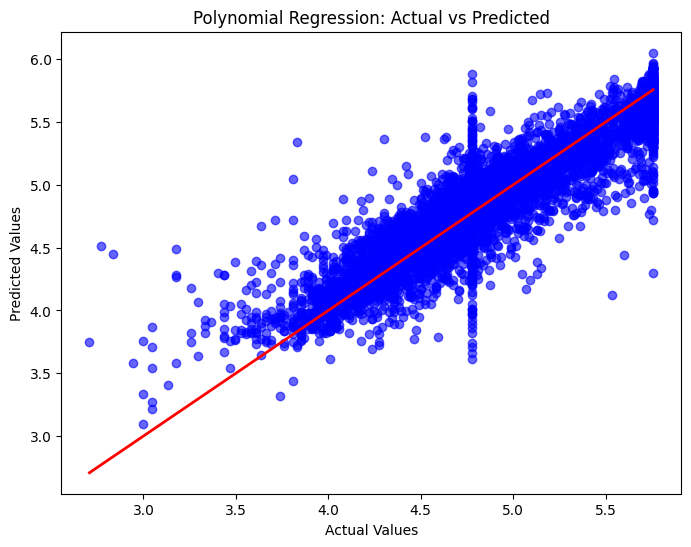

In [64]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Polynomial Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

## Cross validation and Hyperparameter Tuning

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 1,5,6,7, 10,50, 100]}
grid = GridSearchCV(Ridge(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)

Best Parameters: {'alpha': 5}


In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 1,5,6,7, 10,50, 100]}
grid = GridSearchCV(Lasso(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)

Best Parameters: {'alpha': 0.1}


### Lasso and Ridge Hyper parameter tuned ML training

R_2-Score  -0.0006516645603598104
MSE:  0.29247346299323856
MAE:  0.4175517544371191


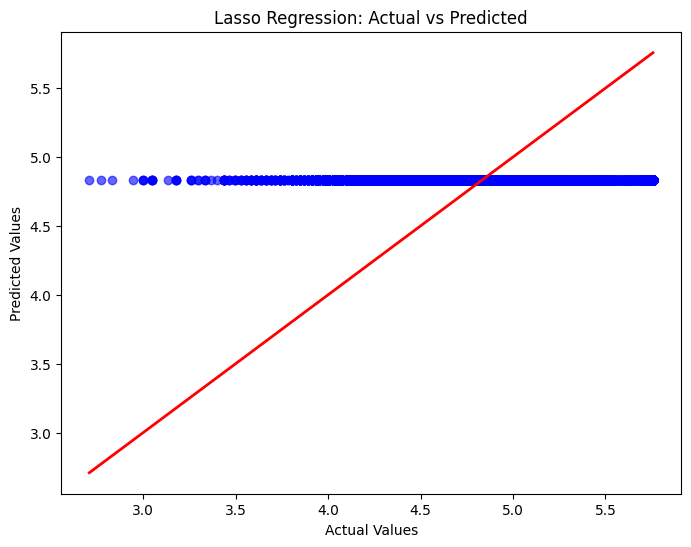

In [68]:
ls=Lasso(alpha=5)
ls.fit(X_train,y_train)
ls_pred=ls.predict(X_test)
r2_scores_ls=r2_score(y_test,ls_pred)
mse_ls=mean_squared_error(y_test,ls_pred)
mae_ls=mean_absolute_error(y_test,ls_pred)
print("R_2-Score ",r2_scores_ls)
print("MSE: ",mse_ls)
print("MAE: ",mae_ls)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, ls_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Lasso Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Residual Vaues:  22593   -0.051928
22459   -0.051928
24213    0.096202
25301    0.421222
20886    0.926271
           ...   
17614   -0.449025
6198    -0.309263
9648    -0.158223
16507   -0.596945
7395     0.088929
Name: AQI, Length: 5907, dtype: float64


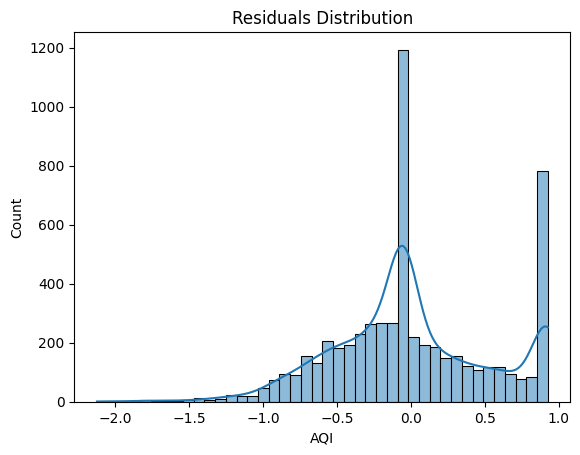

In [70]:
residuals = y_test - ls_pred
sns.histplot(residuals, kde=True)
print("Residual Vaues: ",residuals)
plt.title("Residuals Distribution")
plt.show()


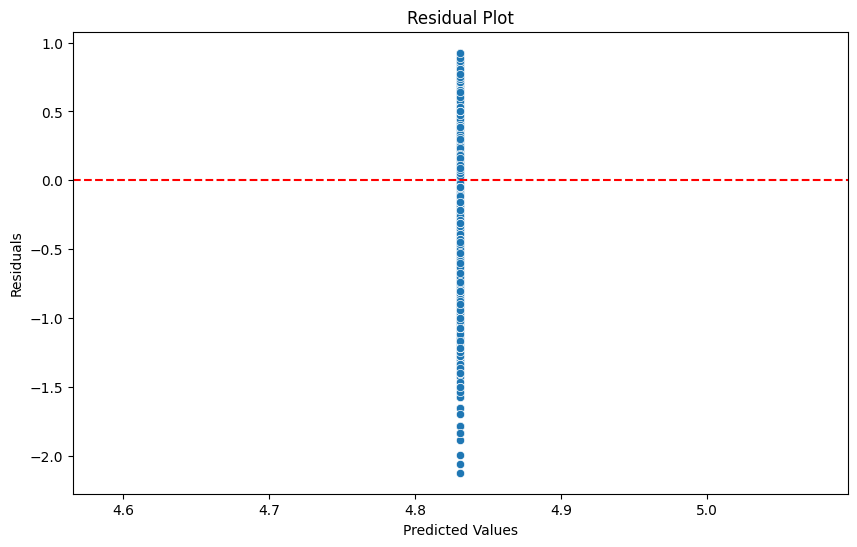

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ls_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

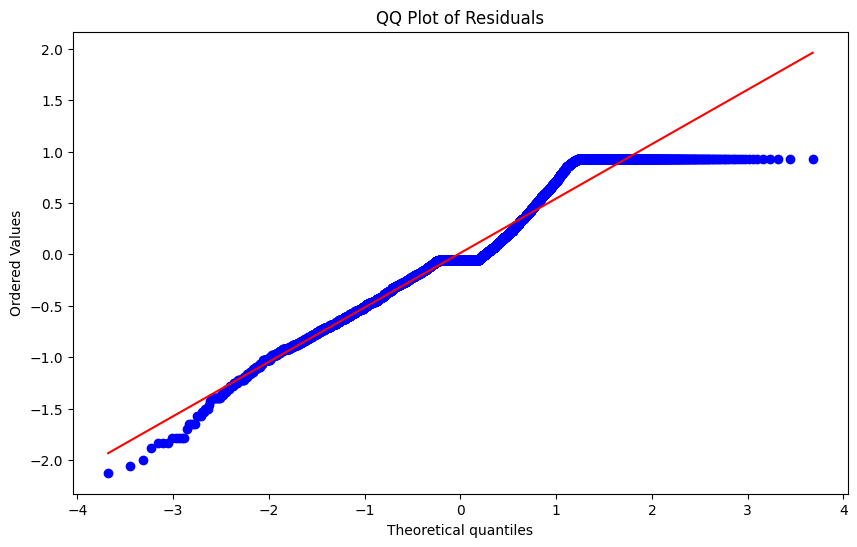

In [72]:
import scipy.stats as stats

# QQ plot
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

## **CLASSIFICATION**

In [73]:
X=data.drop(columns=["City","Date","AQI_Bucket"])
y=data["AQI_Bucket"]

In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [77]:
lr_classifier = LogisticRegression(solver='liblinear', max_iter=1000)
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr= confusion_matrix(y_test, y_pred_lr)
class_report = classification_report(y_test, y_pred_lr)
print("Accuracy:", accuracy_lr)
print("Confusion Matrix:\n", conf_matrix_lr)
print("Classification Report:\n", class_report)

Accuracy: 0.7025562891484679
Confusion Matrix:
 [[  36    0    0  201    0    0]
 [   0 2641    0  116    6    0]
 [   0  482   13    0    7   51]
 [   0  548    0 1063    0    0]
 [   0   50    6    0  116  100]
 [   0  129   20    0   41  281]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.15      0.26       237
           1       0.69      0.96      0.80      2763
           2       0.33      0.02      0.04       553
           3       0.77      0.66      0.71      1611
           4       0.68      0.43      0.52       272
           5       0.65      0.60      0.62       471

    accuracy                           0.70      5907
   macro avg       0.69      0.47      0.49      5907
weighted avg       0.69      0.70      0.66      5907



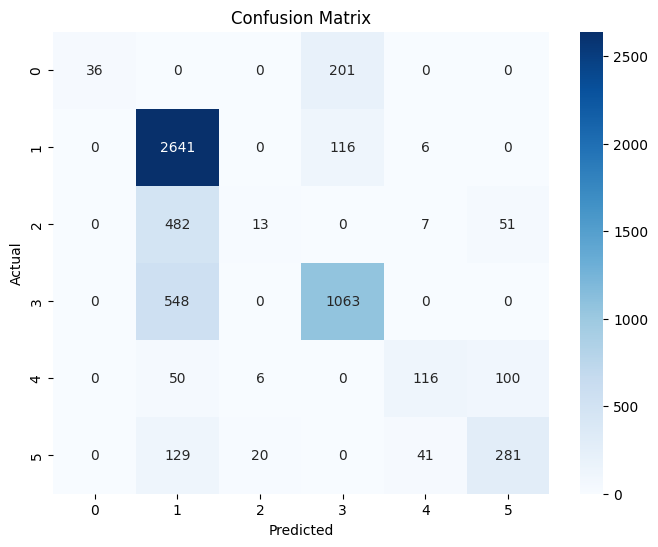

In [78]:
plt.figure(figsize=(8, 6))
class_labels = np.unique(y)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## KNearest Neighbors

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)
class_report = classification_report(y_test, y_pred_knn)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.8261384797697647

Confusion Matrix:
 [[ 171    1    0   65    0    0]
 [   0 2485   59  215    2    2]
 [   0  137  335    1    9   71]
 [  37  156    0 1418    0    0]
 [   0    1   22    0  160   89]
 [   0    7   82    0   71  311]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.72      0.77       237
           1       0.89      0.90      0.90      2763
           2       0.67      0.61      0.64       553
           3       0.83      0.88      0.86      1611
           4       0.66      0.59      0.62       272
           5       0.66      0.66      0.66       471

    accuracy                           0.83      5907
   macro avg       0.76      0.73      0.74      5907
weighted avg       0.82      0.83      0.82      5907



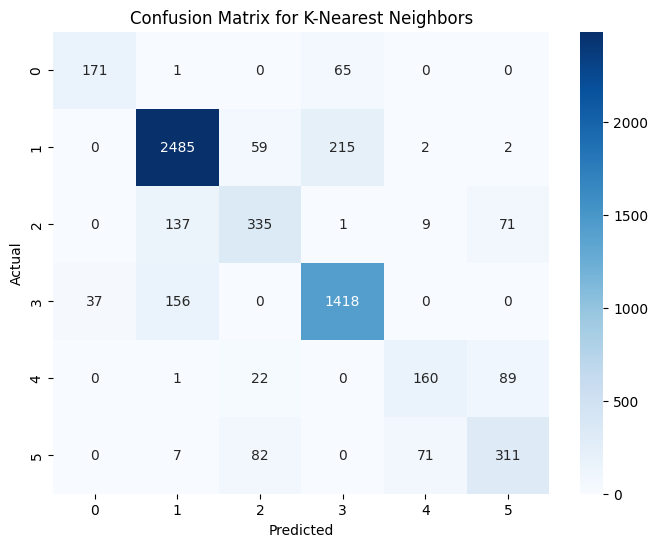

In [81]:
class_labels = np.unique(y)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix for K-Nearest Neighbors")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Support Vector Machine

In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [83]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score, confusion_matrix, classification_report

In [84]:
svm_classifier=SVC(kernel='linear')
svm_classifier.fit(X_train,y_train)
y_pred_svm=svm_classifier.predict(X_test)

In [85]:
acccuracy=accuracy_score(y_test,y_pred_svm)
print("Accuracy: ",acccuracy)
conf_matrix = confusion_matrix(y_test, y_pred_svm)
class_report = classification_report(y_test, y_pred_svm)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy:  0.9588623666835957

Confusion Matrix:
 [[ 233    0    0    4    0    0]
 [   0 2761    1    1    0    0]
 [   0   16  524    0    0   13]
 [   4    8    0 1599    0    0]
 [   0    0    0    0  131  141]
 [   0    0    1    0   54  416]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       237
           1       0.99      1.00      1.00      2763
           2       1.00      0.95      0.97       553
           3       1.00      0.99      0.99      1611
           4       0.71      0.48      0.57       272
           5       0.73      0.88      0.80       471

    accuracy                           0.96      5907
   macro avg       0.90      0.88      0.89      5907
weighted avg       0.96      0.96      0.96      5907



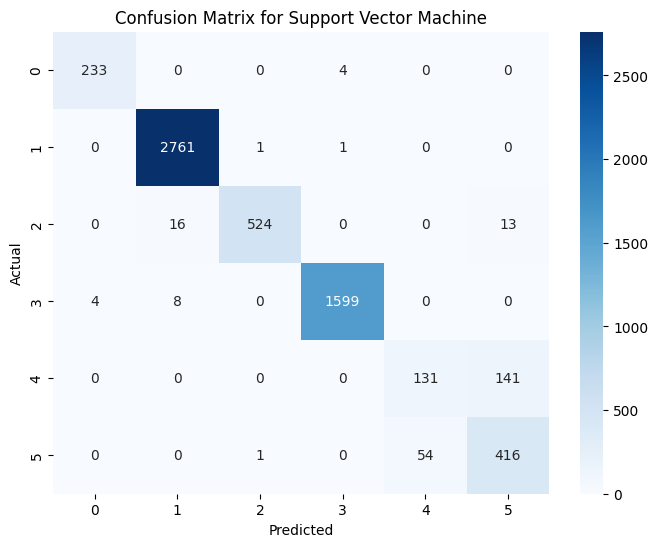

In [86]:
plt.figure(figsize=(8, 6))
class_labels = np.unique(y)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix for Support Vector Machine")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### *Best Model for Air Quality Prediction: SVM_Classifier*
#### *Accuracy:0.9998307093279161*

In [87]:
import joblib
joblib.dump(svm_classifier,"Air-Quality-Prediction-Model.pkl")

['Air-Quality-Prediction-Model.pkl']